In [1]:
import pandas as pd
import joblib

# Récupération des données vectorisées à l'aide de TFIDF  dans la partie précédente.
X_train = joblib.load("X_train_final_tfidf.pkl")
y_train = joblib.load("y_train_final.pkl")
X_test = joblib.load("X_test_vec.pkl")
y_test = joblib.load("y_test.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")


In [2]:
# Import pour les différents modèles
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC

# Import Metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import f1_score

# Import pour les matrices de confusion
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Création du dossier où enregistrer les modèles
import os
os.makedirs("Models", exist_ok=True)

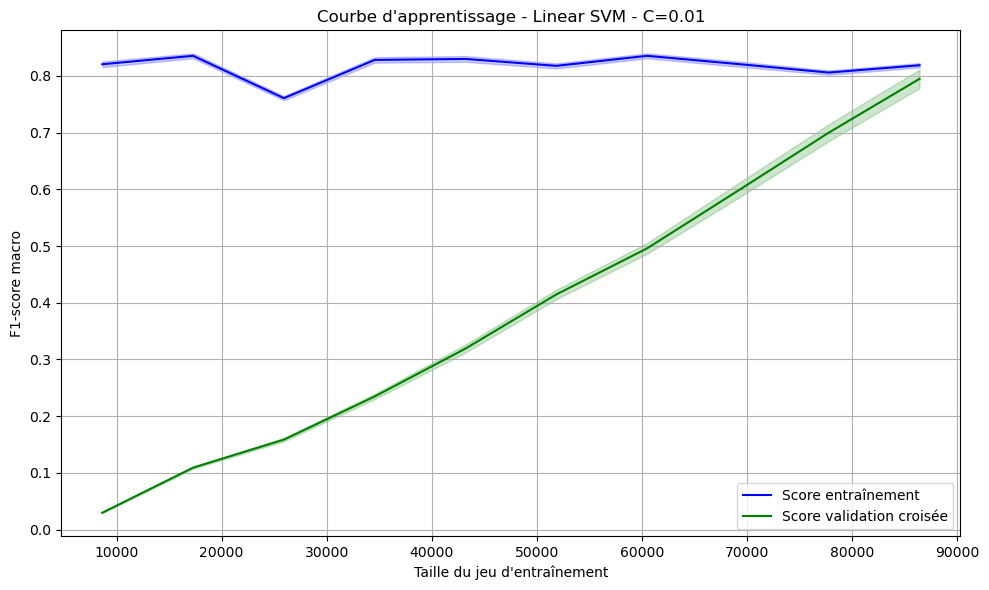

In [6]:
# LINEAR SVM

# Courbe d'apprentissage 

from sklearn.model_selection import learning_curve, StratifiedKFold

train_sizes, train_scores, val_scores = learning_curve(
    LinearSVC(C=0.01, random_state=25),
    X_train,
    y_train,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=25),
    scoring='f1_macro',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Moyennes et écarts types
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

# Graphique
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Score entraînement", color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(train_sizes, val_scores_mean, label="Score validation croisée", color="green")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color="green")

plt.title("Courbe d'apprentissage - Linear SVM - C=0.01")
plt.xlabel("Taille du jeu d'entraînement")
plt.ylabel("F1-score macro")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Score entraînement : ~0.82
- Score validation croisée : part de très bas, atteint ~0.8
- Écart faible, mais les scores relativement faible

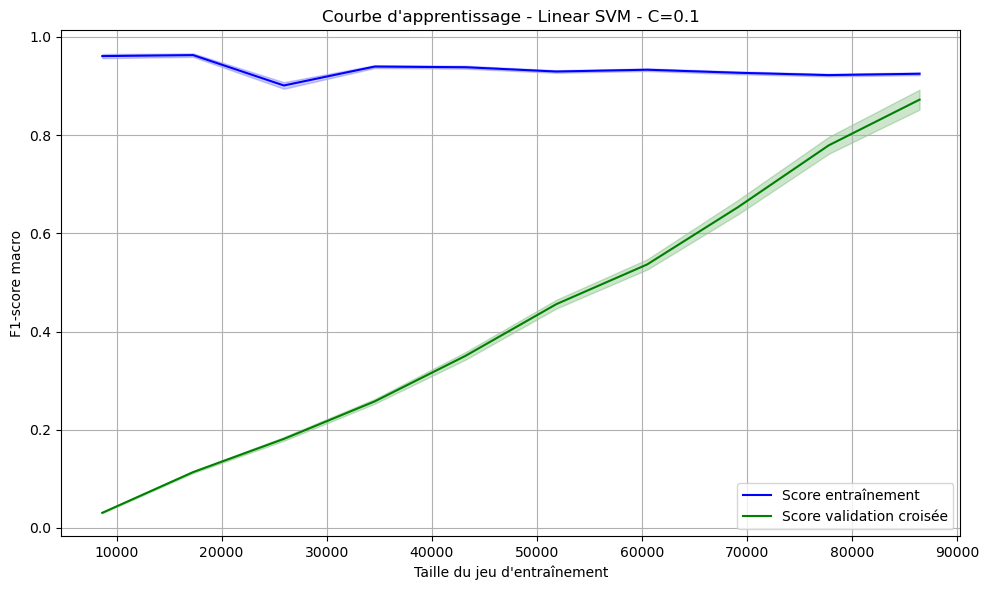

In [7]:
train_sizes, train_scores, val_scores = learning_curve(
    LinearSVC(C=0.1, random_state=25),
    X_train,
    y_train,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=25),
    scoring='f1_macro',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Moyennes et écarts types
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

# Graphique
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Score entraînement", color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(train_sizes, val_scores_mean, label="Score validation croisée", color="green")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color="green")

plt.title("Courbe d'apprentissage - Linear SVM - C=0.1")
plt.xlabel("Taille du jeu d'entraînement")
plt.ylabel("F1-score macro")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Score entraînement : élevé (~0.95)
- Score validation : monte à 0.88
- Écart plus prononcé que précédemment, mais les performances s’améliorent bien

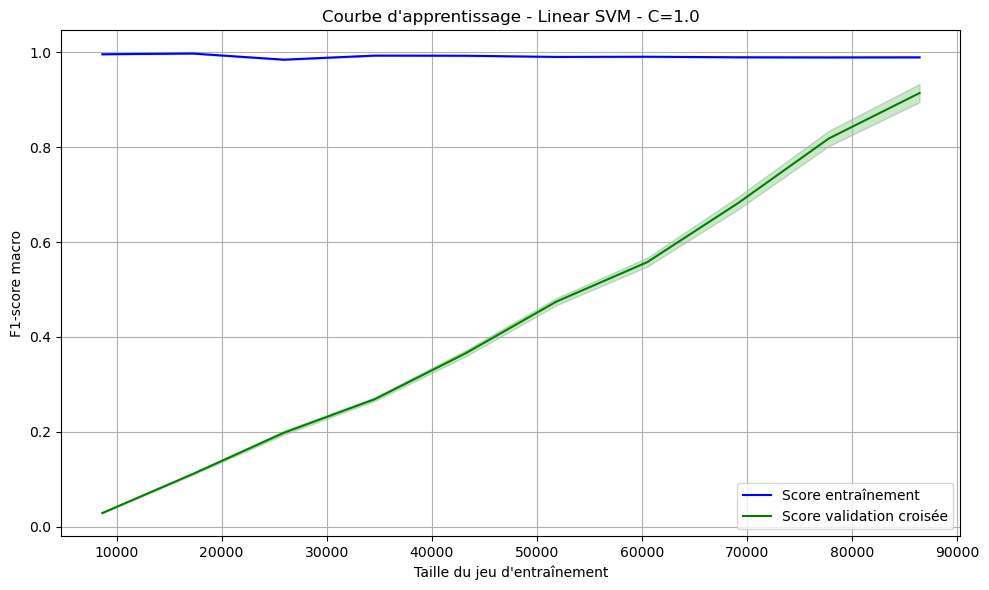

In [8]:
train_sizes, train_scores, val_scores = learning_curve(
    LinearSVC(C=1.0, random_state=25),
    X_train,
    y_train,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=25),
    scoring='f1_macro',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Moyennes et écarts types
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

# Graphique
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Score entraînement", color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(train_sizes, val_scores_mean, label="Score validation croisée", color="green")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color="green")

plt.title("Courbe d'apprentissage - Linear SVM - C=1.0")
plt.xlabel("Taille du jeu d'entraînement")
plt.ylabel("F1-score macro")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Score entraînement : très haut (~0.98). Il y a potentiellement du surapprentissage 
- Score de validation : atteint 0.91
- Le modèle semble être très performance avec son score de validation de 0.9, mais l'écart avec la courbe d'apprentissage commence à être significatif. Il n'en faut pas plus

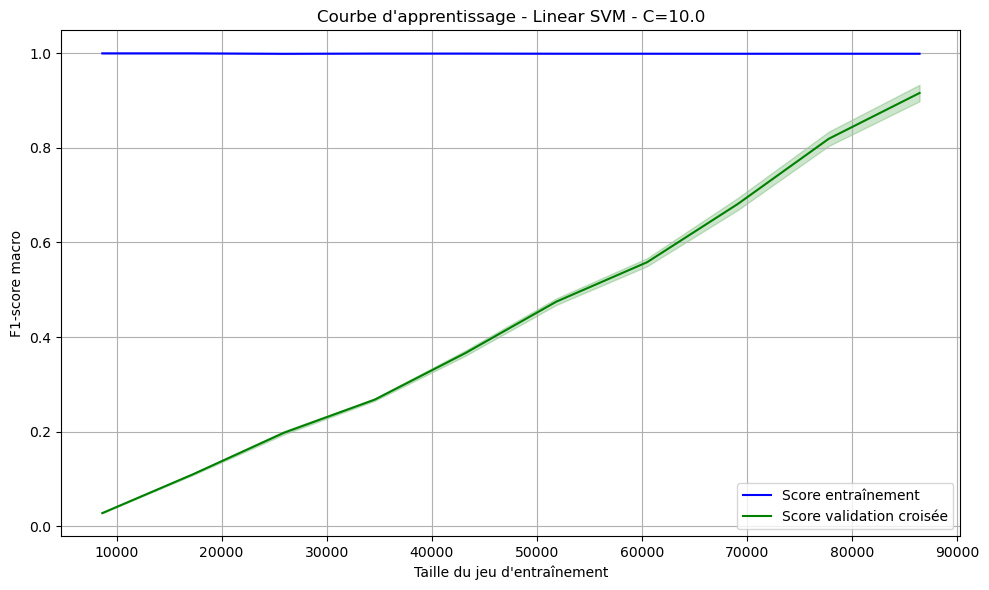

In [9]:
train_sizes, train_scores, val_scores = learning_curve(
    LinearSVC(C=10.0, random_state=25),
    X_train,
    y_train,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=25),
    scoring='f1_macro',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Moyennes et écarts types
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

# Graphique
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Score entraînement", color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(train_sizes, val_scores_mean, label="Score validation croisée", color="green")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color="green")

plt.title("Courbe d'apprentissage - Linear SVM - C=10.0")
plt.xlabel("Taille du jeu d'entraînement")
plt.ylabel("F1-score macro")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Score d'entrainement = 1. Le score est trop parfait, il y a un surapprentissage certain
- Score de validation légèrement plus faible que la courbe précédente.
- Le gain par rapport au modèle précédent ne semble pas évident. Le modèle précédent semble être un meilleur compromis.

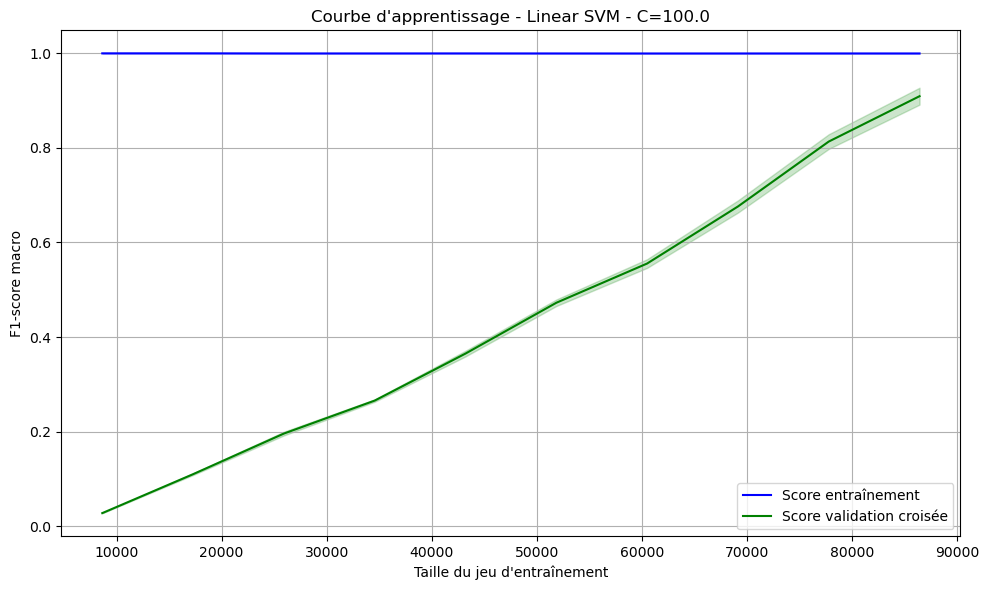

In [10]:
train_sizes, train_scores, val_scores = learning_curve(
    LinearSVC(C=100.0, random_state=25),
    X_train,
    y_train,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=25),
    scoring='f1_macro',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Moyennes et écarts types
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

# Graphique
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Score entraînement", color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(train_sizes, val_scores_mean, label="Score validation croisée", color="green")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color="green")

plt.title("Courbe d'apprentissage - Linear SVM - C=100.0")
plt.xlabel("Taille du jeu d'entraînement")
plt.ylabel("F1-score macro")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Même observation que pour le modèle C=10

In [11]:
# LINEAR SVM

# En conclusion, on optera pour le modèle C=1

svm_model = LinearSVC(C=1, random_state=25)
svm_model.fit(X_train, y_train)

# Prédiction
y_pred_svm = svm_model.predict(X_test)

# Évaluation
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
print("Accuracy du modèle SVM :", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report SVM :\n", classification_report(y_test, y_pred_svm))

# Score
acc_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = report_svm["macro avg"]["f1-score"]

# Enregistrement du modèle
joblib.dump(svm_model, "Models/linear_svm.pkl")
np.save("Predictions/y_pred_svm.npy", y_pred_svm)

Accuracy du modèle SVM : 0.8216854471349796

Classification Report SVM :
               precision    recall  f1-score   support

          10       0.47      0.48      0.47       623
          40       0.71      0.66      0.69       496
          50       0.76      0.78      0.77       329
          60       0.85      0.87      0.86       163
        1140       0.77      0.83      0.80       533
        1160       0.92      0.95      0.94       790
        1180       0.65      0.62      0.63       153
        1280       0.75      0.64      0.69       969
        1281       0.56      0.58      0.57       408
        1300       0.94      0.95      0.94      1001
        1301       0.93      0.91      0.92       139
        1302       0.80      0.85      0.83       475
        1320       0.83      0.82      0.83       645
        1560       0.84      0.82      0.83      1000
        1920       0.88      0.94      0.91       816
        1940       0.85      0.94      0.89       160
       

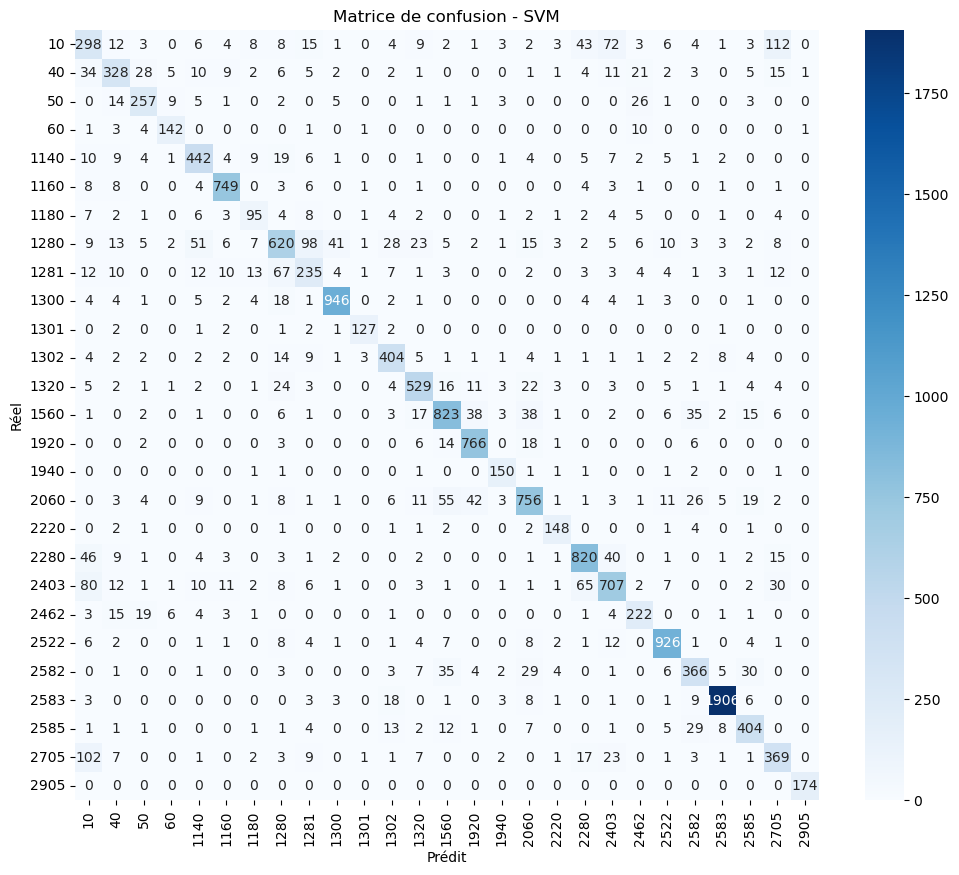

In [12]:
# Matrice de confusion
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title("Matrice de confusion - SVM")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

In [15]:
# Importance des mots

# Récupère les noms de mots
feature_names = vectorizer.get_feature_names_out()
coefficients = svm_model.coef_

# Pour les 5 mots les plus importants par classe
for i, class_label in enumerate(svm_model.classes_):
    top_features = np.argsort(coefficients[i])[-5:]
    print(f"\nClasse {class_label} : Top mots")
    for feat in reversed(top_features):
        print(f"  {feature_names[feat]} ({coefficients[i][feat]:.3f})")


Classe 10 : Top mots
  ammareal (2.776)
  soupcon (2.367)
  introduction (2.116)
  traduire (2.089)
  traduit (2.072)

Classe 40 : Top mots
  magideal (7.558)
  quickio (4.779)
  import (3.741)
  description (3.641)
  might (2.572)

Classe 50 : Top mots
  tenale (3.455)
  gamer (2.912)
  amiibo (2.834)
  filaire (2.689)
  gaming (2.658)

Classe 60 : Top mots
  to (3.215)
  8go (2.942)
  portable (2.871)
  watch (2.613)
  marque (2.514)

Classe 1140 : Top mots
  watermelon (4.259)
  figurine (4.023)
  shirt (3.852)
  magnet (3.242)
  gundam (2.985)

Classe 1160 : Top mots
  mtg (3.997)
  adrenalyn (3.419)
  ccg (3.295)
  vo (3.065)
  panini (2.944)

Classe 1180 : Top mots
  heroclix (4.212)
  warhammer (3.237)
  40k (2.959)
  oop (2.886)
  role (2.786)

Classe 1280 : Top mots
  quickio (3.850)
  doudou (3.544)
  kinder (3.207)
  fua1997 (3.052)
  ty (2.665)

Classe 1281 : Top mots
  shen (4.190)
  propos (3.796)
  monopoly (3.098)
  tarot (2.759)
  joueur (2.688)

Classe 1300 : Top mot

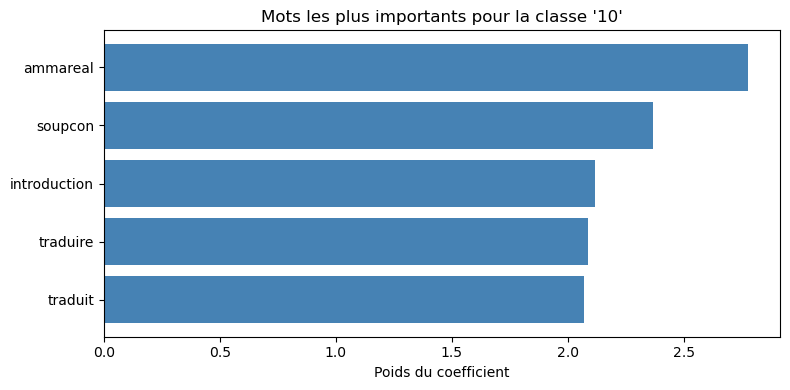

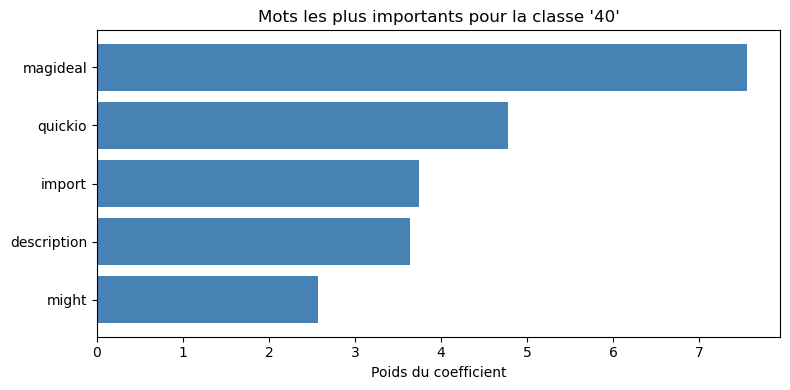

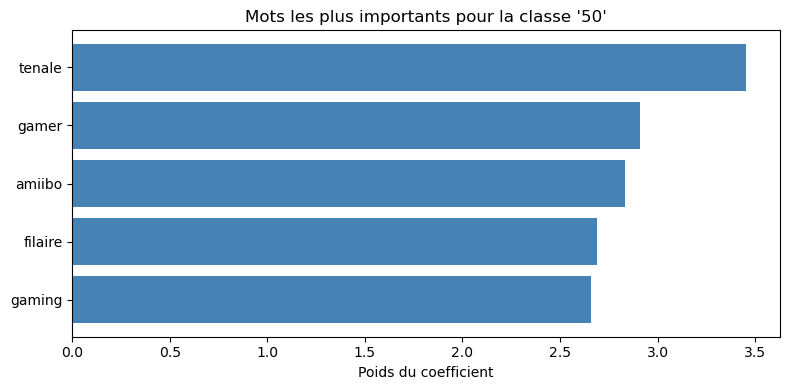

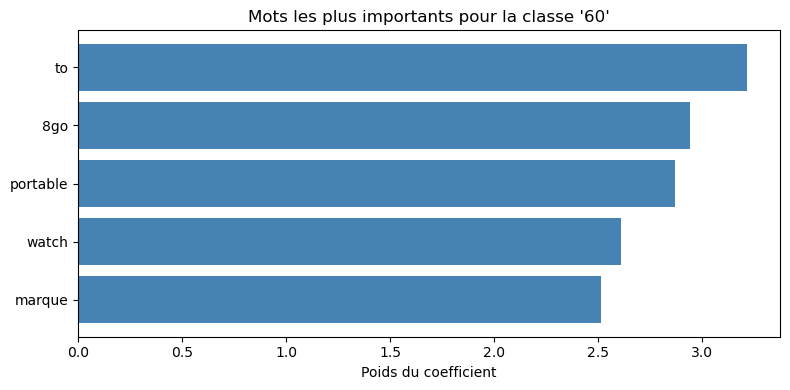

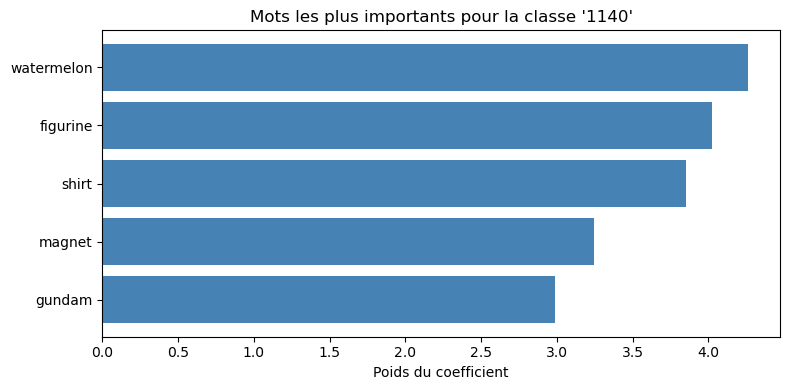

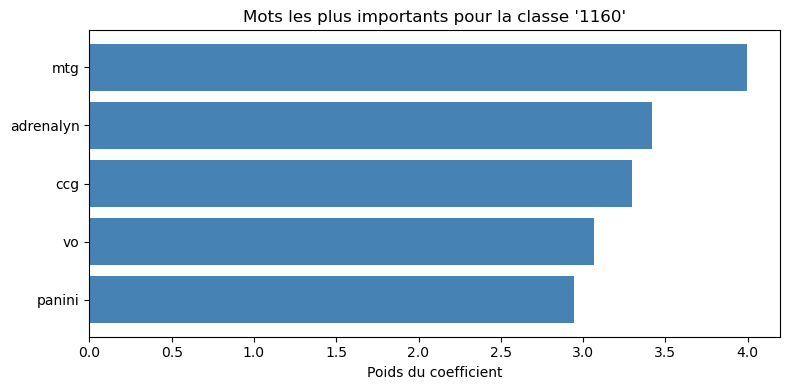

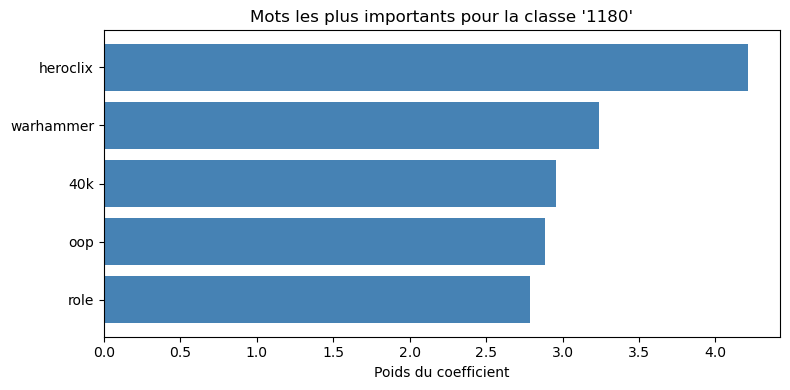

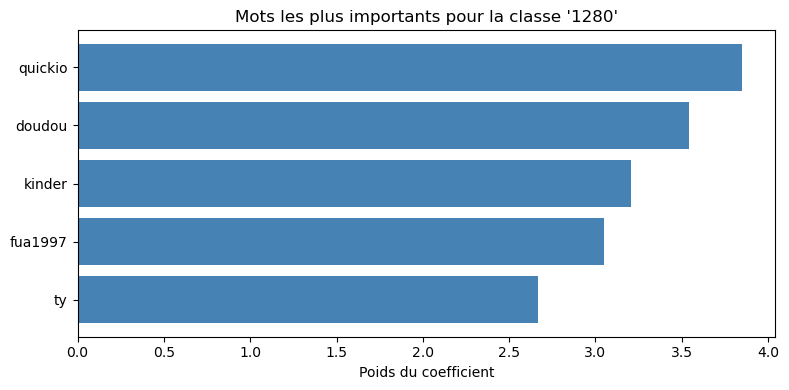

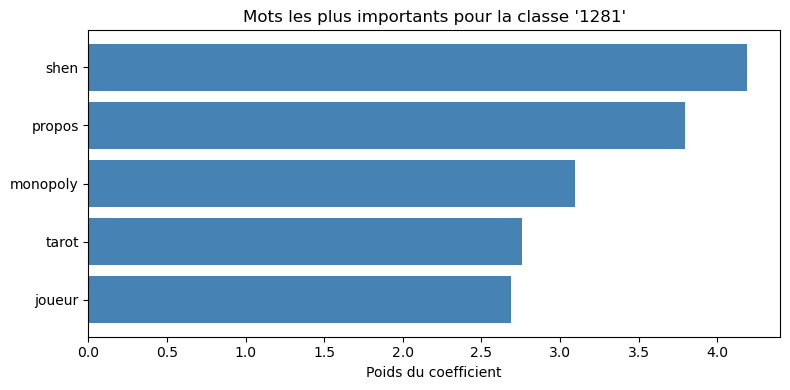

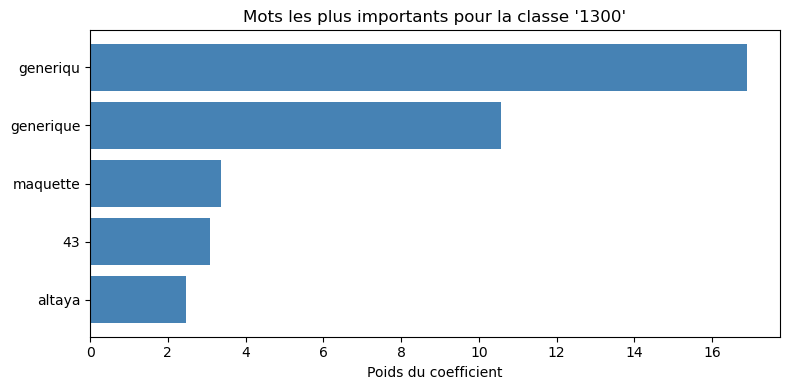

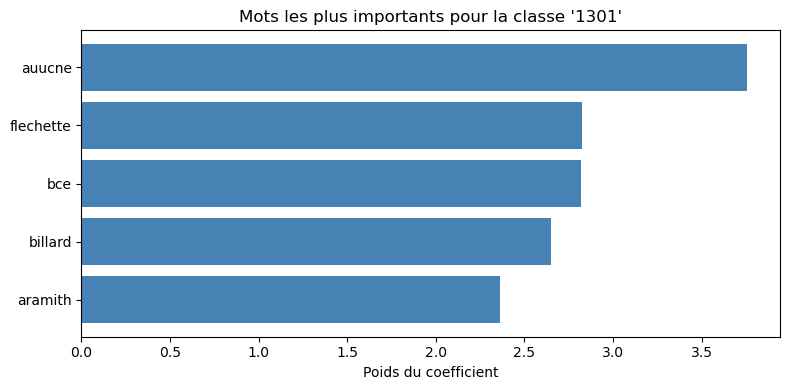

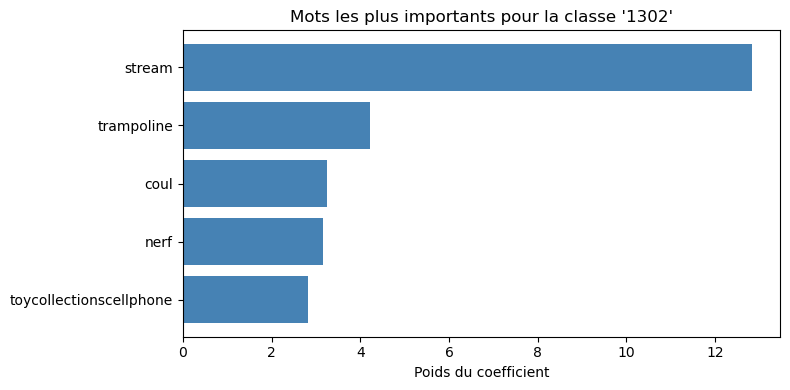

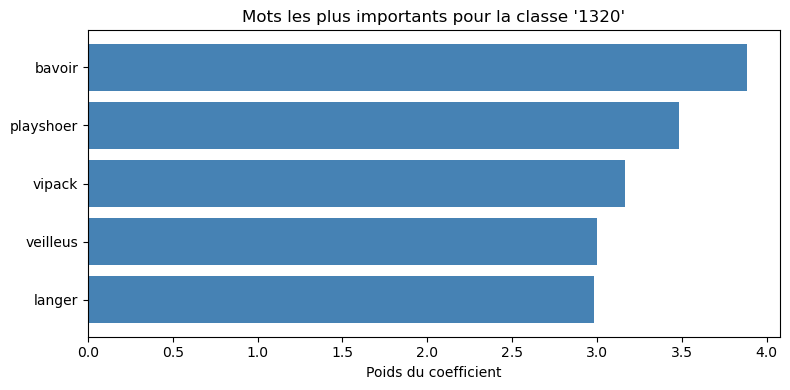

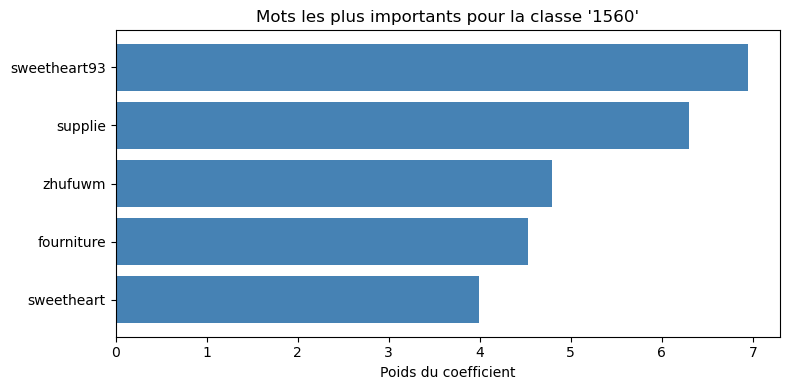

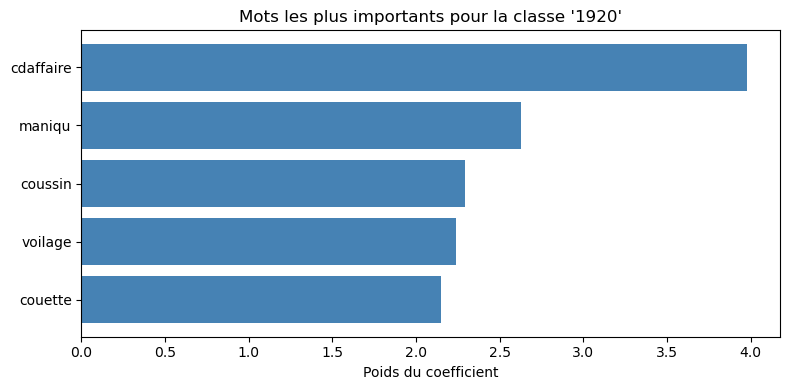

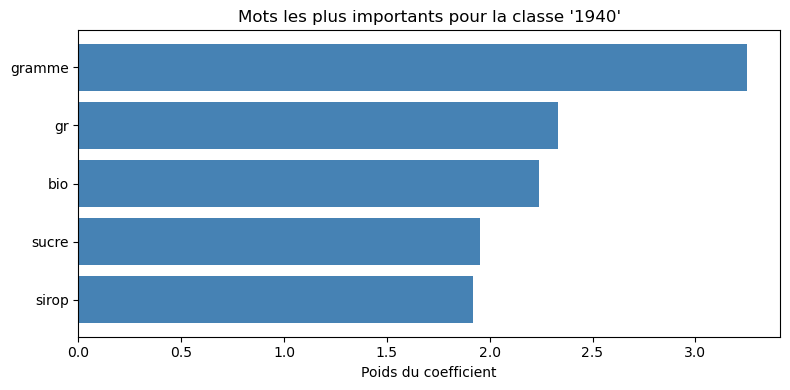

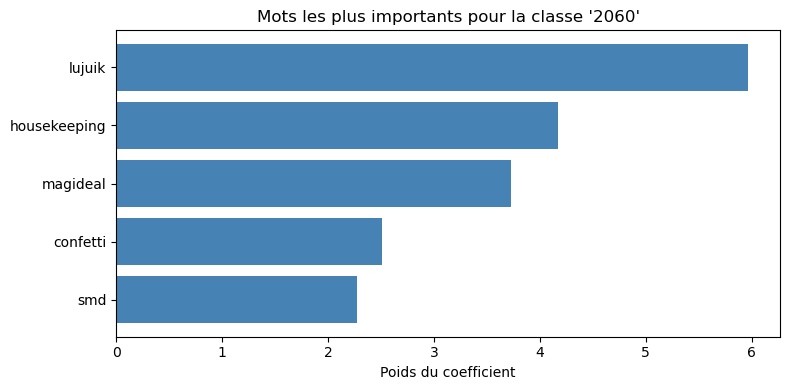

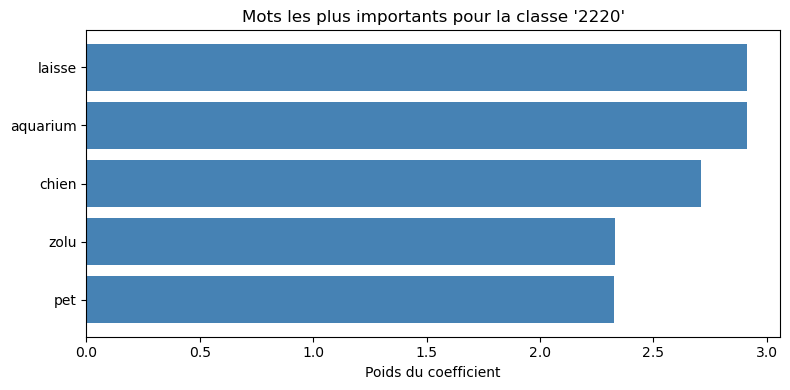

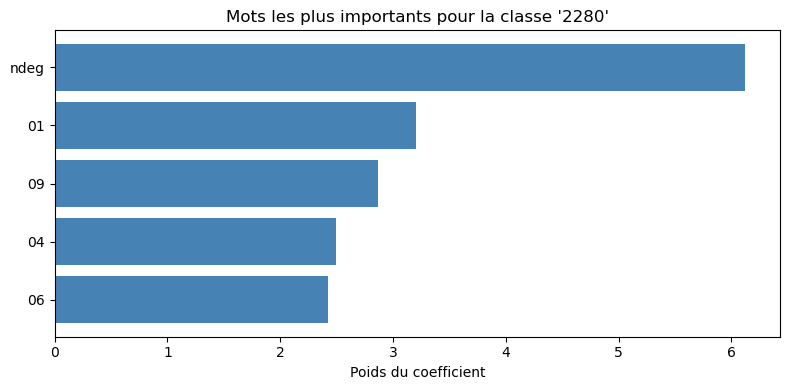

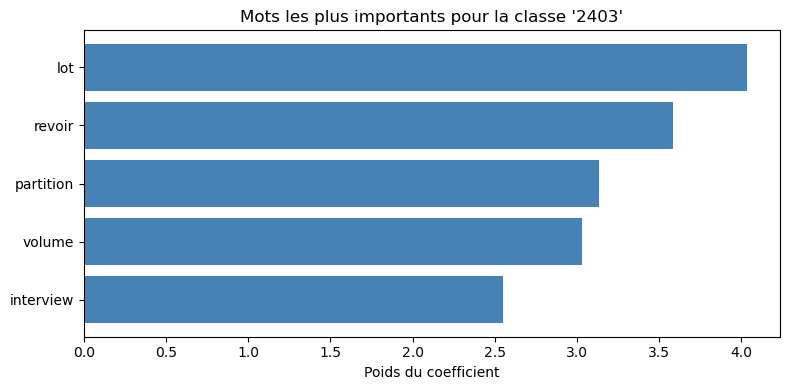

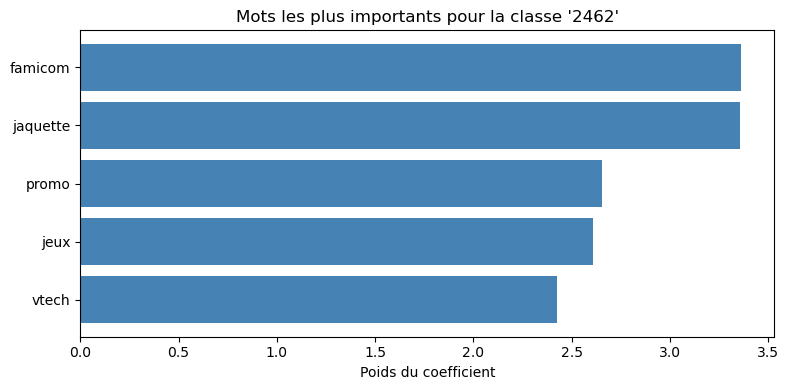

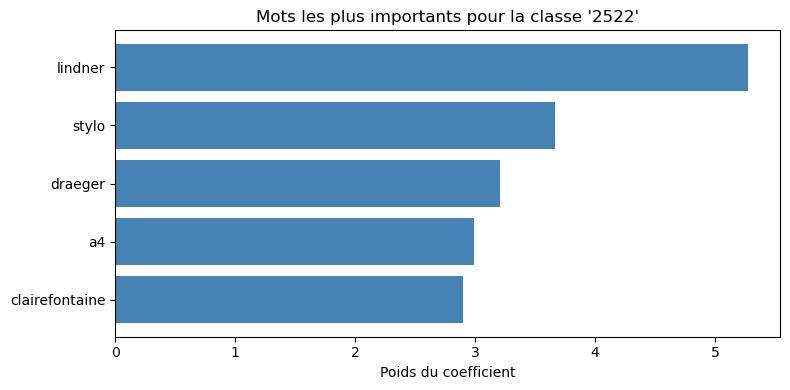

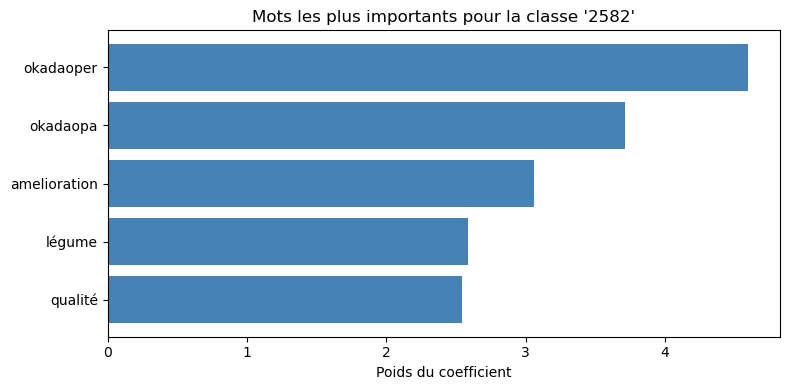

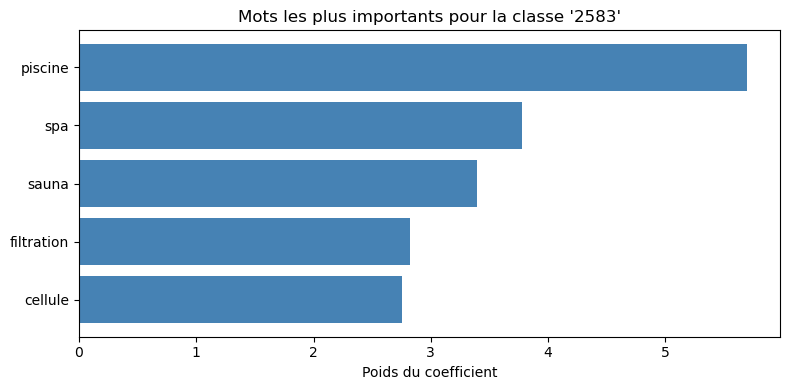

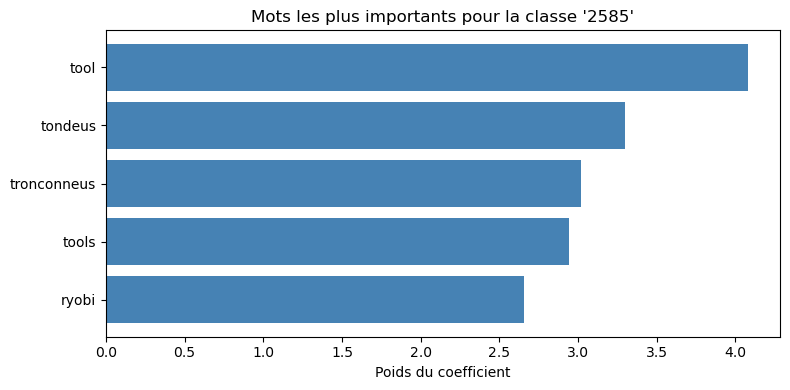

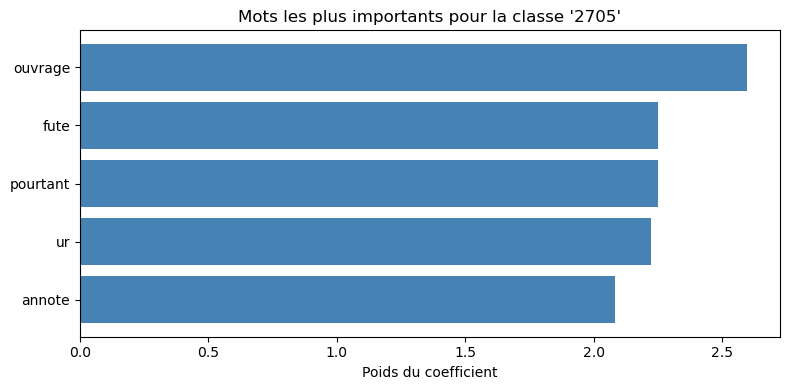

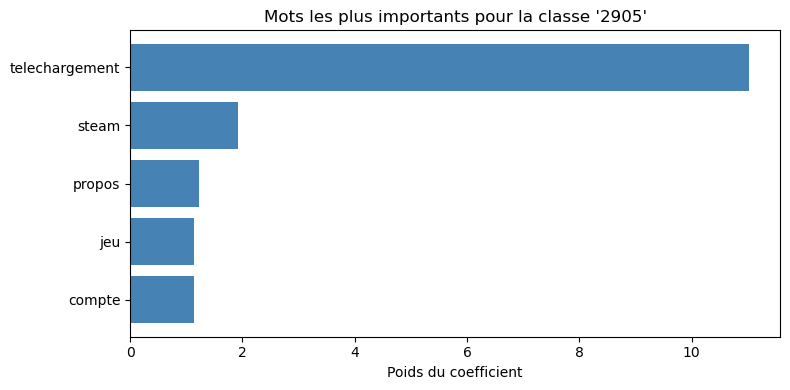

In [16]:
# Graphique des mots les plus influents

import matplotlib.pyplot as plt

for i, class_label in enumerate(svm_model.classes_):
    top_feats_idx = np.argsort(coefficients[i])[-5:]
    top_feats = feature_names[top_feats_idx]
    top_coefs = coefficients[i][top_feats_idx]

    plt.figure(figsize=(8, 4))
    plt.barh(top_feats, top_coefs, color="steelblue")
    plt.xlabel("Poids du coefficient")
    plt.title(f"Mots les plus importants pour la classe '{class_label}'")
    plt.tight_layout()
    plt.show()

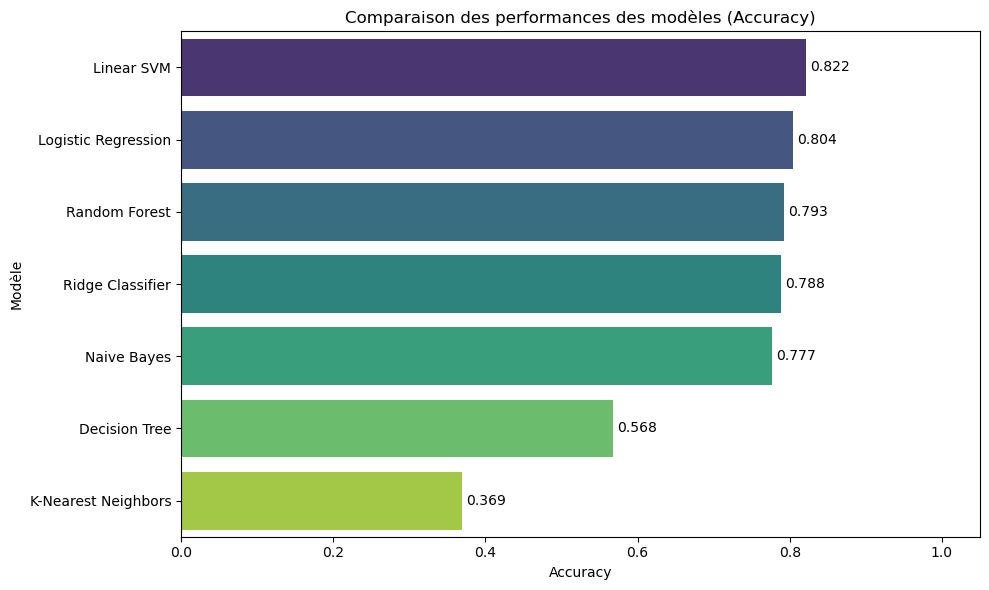

In [13]:
### GRAPHIQUE COMPARATIF DES SCORES (ACCURACY) DIFFERENTS MODELES

import numpy as np

# Nom des modèles
model_names = [
    "K-Nearest Neighbors",
    "Decision Tree",
    "Naive Bayes",
    "Logistic Regression",
    "Random Forest",
    "Ridge Classifier",
    "Linear SVM"
]

# Chargement des prédictions
y_pred_knn = np.load("Predictions/y_pred_knn.npy")
y_pred_tree = np.load("Predictions/y_pred_tree.npy")
y_pred_nb = np.load("Predictions/y_pred_nb.npy")
y_pred_lr = np.load("Predictions/y_pred_lr.npy")
y_pred_rf = np.load("Predictions/y_pred_rf.npy")
y_pred_rdg = np.load("Predictions/y_pred_rdg.npy")
y_pred_svm = np.load("Predictions/y_pred_svm.npy")

# Accuracy 
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_tree = accuracy_score(y_test, y_pred_tree)
acc_nb = accuracy_score(y_test, y_pred_nb)
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_rdg = accuracy_score(y_test, y_pred_rdg)
acc_svm = accuracy_score(y_test, y_pred_svm)

accuracies = [
    acc_knn,
    acc_tree,
    acc_nb,
    acc_lr,
    acc_rf,
    acc_rdg,
    acc_svm
]

results_df = pd.DataFrame({
    "Modèle": model_names,
    "Accuracy": accuracies
}).sort_values(by="Accuracy", ascending=False)


# Graphique
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=results_df, x="Accuracy", y="Modèle", hue="Modèle", palette="viridis", dodge=False, legend=False)
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', padding=3)

plt.title("Comparaison des performances des modèles (Accuracy)")
plt.xlabel("Accuracy")
plt.ylabel("Modèle")
plt.xlim(0, 1.05)
plt.tight_layout()
plt.show()

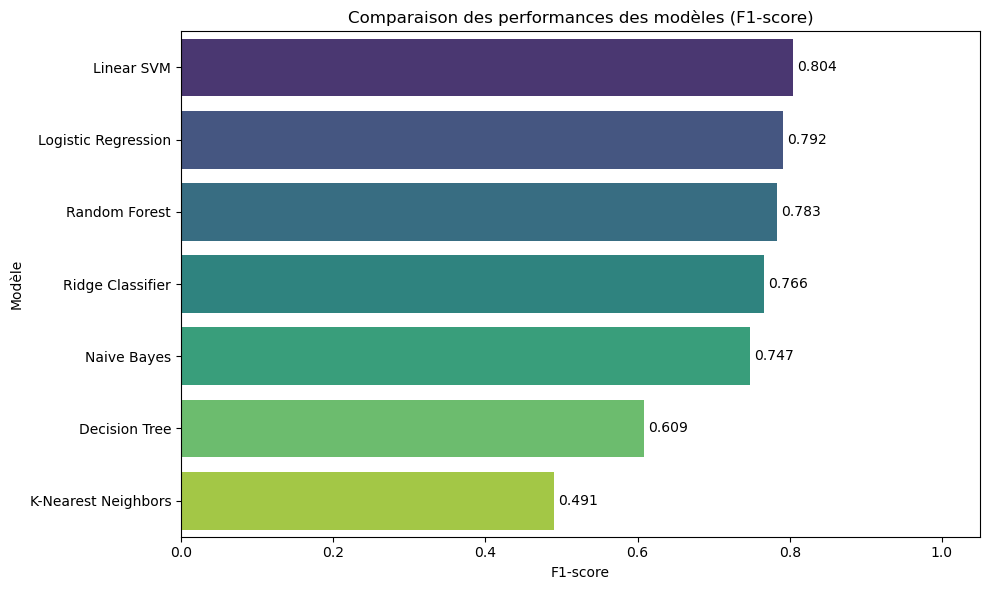

In [14]:
# GRAPHIQUE COMPARATIF DES F1-SCORES DES DIFFERENTS MODELES

# Nom des modèles
model_names = [
    "K-Nearest Neighbors",
    "Decision Tree",
    "Naive Bayes",
    "Logistic Regression",
    "Random Forest",
    "Ridge Classifier",
    "Linear SVM"
]

# Chargement des prédictions
y_pred_knn = np.load("Predictions/y_pred_knn.npy")
y_pred_tree = np.load("Predictions/y_pred_tree.npy")
y_pred_nb = np.load("Predictions/y_pred_nb.npy")
y_pred_lr = np.load("Predictions/y_pred_lr.npy")
y_pred_rf = np.load("Predictions/y_pred_rf.npy")
y_pred_rdg = np.load("Predictions/y_pred_rdg.npy")
y_pred_svm = np.load("Predictions/y_pred_svm.npy")

# Rapports
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
report_tree = classification_report(y_test, y_pred_tree, output_dict=True)
report_nb = classification_report(y_test, y_pred_nb, output_dict=True)
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_rdg = classification_report(y_test, y_pred_rdg, output_dict=True)
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)

# F1 scores
f1_knn = report_knn["macro avg"]["f1-score"]
f1_tree = report_tree["macro avg"]["f1-score"]
f1_nb = report_nb["macro avg"]["f1-score"]
f1_lr= report_lr["macro avg"]["f1-score"]
f1_rf = report_rf["macro avg"]["f1-score"]
f1_rdg = report_rdg["macro avg"]["f1-score"]
f1_svm = report_svm["macro avg"]["f1-score"]

f1_scores = [
    f1_knn,
    f1_tree,
    f1_nb,
    f1_lr,
    f1_rf,
    f1_rdg,
    f1_svm
]

f1_df = pd.DataFrame({
    "Modèle": model_names,
    "F1_avg": f1_scores
}).sort_values(by="F1_avg", ascending=False)


# Graphique
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=f1_df, x="F1_avg", y="Modèle", hue="Modèle", palette="viridis", dodge=False, legend=False)
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', padding=3)

plt.title("Comparaison des performances des modèles (F1-score)")
plt.xlabel("F1-score")
plt.ylabel("Modèle")
plt.xlim(0, 1.05)
plt.tight_layout()
plt.show()
